In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPRegressor

Mengimport library yg akan dipakai untuk mengelola data

In [2]:
train_data = pd.read_csv('train-data.csv', sep=';')
test_data = pd.read_csv('test-data.csv', sep=';')

Menampilkan data dari kedua dataset yaitu train-data dan test-data, dengan memberikan space pemisah agar tampilan data rapi

In [3]:
print(train_data.head())
print(test_data.head())

   Unnamed: 0                              Name    Location  Year  \
0           0            Maruti Wagon R LXI CNG      Mumbai  2010   
1           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           2                      Honda Jazz V     Chennai  2011   
3           3                 Maruti Ertiga VDI     Chennai  2012   
4           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price        Price  
0  58.16 bhp    5.0        NaN      0,09375  
1  126.2 bhp    5.

Menampilkan data dari kedua dataset

In [4]:
def clean_data(data):
    data['Mileage'] = data['Mileage'].astype(str).str.replace(' km/kg', '').str.replace(' kmpl', '')
    data['Mileage'] = pd.to_numeric(data['Mileage'], errors='coerce')  # Convert to float

    data['Engine'] = data['Engine'].astype(str).str.replace(' CC', '')
    data['Engine'] = pd.to_numeric(data['Engine'], errors='coerce')  # Convert to float

    data['Power'] = data['Power'].astype(str).str.replace(' bhp', '').replace('null', '')
    data['Power'] = pd.to_numeric(data['Power'], errors='coerce')  # Convert to float

    data['New_Price'] = data['New_Price'].astype(str).str.replace(' Lakh', '').replace('0', '')
    data['New_Price'] = pd.to_numeric(data['New_Price'], errors='coerce') * 100000  # Convert to float

    data['Price'] = data['Price'].astype(str).str.replace(',', '').replace('null', '')
    data['Price'] = pd.to_numeric(data['Price'], errors='coerce')  # Convert to float
    
    return data

Mengconvert type data menjadi float agar dataset dapat diolah menggunakan multilayer perceptron

In [5]:
train_data = train_data.drop(columns=['Price'])

Drop/Menghapus kolom Price dari dataset train_data, karena kolom tersebut hanya berada di satu dataset jadi saya menghapusnya agar lebih mudah dalam pengelolaan datasetnya

In [6]:
print(train_data.head())

   Unnamed: 0                              Name    Location  Year  \
0           0            Maruti Wagon R LXI CNG      Mumbai  2010   
1           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           2                      Honda Jazz V     Chennai  2011   
3           3                 Maruti Ertiga VDI     Chennai  2012   
4           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  
0  58.16 bhp    5.0        NaN  
1  126.2 bhp    5.0        NaN  
2   88.7 bh

Ini tampilan data setelah drop column

In [7]:
def clean_data(data):
    # Ensure all columns are strings before applying string operations
    data['Mileage'] = data['Mileage'].astype(str).str.replace(' km/kg', '').str.replace(' kmpl', '')
    data['Mileage'] = pd.to_numeric(data['Mileage'], errors='coerce')  # Convert to float, set errors to NaN

    data['Engine'] = data['Engine'].astype(str).str.replace(' CC', '')
    data['Engine'] = pd.to_numeric(data['Engine'], errors='coerce')  # Convert to float, set errors to NaN

    data['Power'] = data['Power'].astype(str).str.replace(' bhp', '').replace('null', '')
    data['Power'] = pd.to_numeric(data['Power'], errors='coerce')  # Convert to float, set errors to NaN

    data['New_Price'] = data['New_Price'].astype(str).str.replace(' Lakh', '').replace('0', '')
    data['New_Price'] = pd.to_numeric(data['New_Price'], errors='coerce') * 100000  # Convert to float, set errors to NaN
    
    return data

Mengconvert kembali type data menjadi float agar dataset dapat diolah menggunakan multilayer perceptron, karena sebelumnya drop column

In [8]:
train_data = clean_data(train_data)
test_data = clean_data(test_data)

clean_data digunakan untuk membersihkan data sebelum digunakan dalam training agar tidak mengganggu proses pelatihan dan evaluasi model

In [9]:
target_column = 'Mileage'

Merupakan column yg ingin diprediksi dalam model MLP

In [10]:
X_train = train_data.drop(columns=[target_column])
y_train = train_data[target_column]

X_train berisi semua fitur yang digunakan untuk training dan y_train berisi nilai yang ingin diprediksi (Mileage)

In [11]:
X_test = test_data.drop(columns=[target_column])
y_test = test_data[target_column]

X_test berisi semua fitur yang digunakan untuk testing data dan y_test berisi nilai yang digunakan untuk mengevaluasi hasil prediksi dari model (Mileage)

In [12]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

Fungsi pd.get_dummies(X_train) akan mengonversi semua kolom kategori dalam X_train menjadi kolom biner (0 atau 1), di mana setiap kategori yang ada dalam kolom tersebut akan menjadi kolom baru. Ini diterapkan pada kedua dataset, X_train dan X_test, untuk memastikan bahwa model dapat menggunakan fitur kategori yang ada dalam kedua dataset dengan cara yang sama

In [13]:
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

align() digunakan untuk memastikan bahwa X_train dan X_test memiliki kolom yang sama setelah proses pengconvertan tadi

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

StandardScaler memastikan bahwa setiap fitur dalam data pelatihan dan data uji memiliki distribusi yang sama, langkah ini dilakukan dengan menghitung statistik pada X_train dan menggunakan statistik tersebut untuk mentransformasikan kedua dataset tersebut

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

imputer = SimpleImputer(strategy='mean')

SimpleImputer digunakan untuk mengatasi missing values dalam dataset dengan mengisi nilai yang hilang, dalam hal ini mean

In [16]:
pipeline = make_pipeline(imputer, StandardScaler())

In [17]:
X_train_scaled = pipeline.fit_transform(X_train)
X_test_scaled = pipeline.transform(X_test)

target_imputer = SimpleImputer(strategy='mean')

target_imputer = SimpleImputer(strategy='mean') digunakan untuk mengisi nilai yang hilang pada variabel target dengan rata-rata, memastikan data target siap digunakan untuk pelatihan model tanpa kehilangan informasi penting

In [18]:
y_train_imputed = target_imputer.fit_transform(y_train.values.reshape(-1, 1))
y_test_imputed = target_imputer.transform(y_test.values.reshape(-1, 1))

y_train_imputed = target_imputer.fit_transform(y_train.values.reshape(-1, 1)) digunakan untuk mengimputasi nilai yang hilang dalam variabel target di data pelatihan dengan nilai rata-rata, sedangkan y_test_imputed = target_imputer.transform(y_test.values.reshape(-1, 1)) digunakan untuk mengimputasi nilai yang hilang dalam variabel target di data pengujian dengan nilai rata-rata yang dihitung dari data pelatihan, menjaga agar tidak terjadi data leakage dan memastikan evaluasi yang benar

In [19]:
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000)
mlp.fit(X_train_scaled, y_train_imputed)

D:\Anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(max_iter=1000)

In [20]:
y_pred = mlp.predict(X_test_scaled)

mlp.predict(X_test_scaled) digunakan untuk menghasilkan prediksi dari model MLPRegressor yang telah dilatih pada data training. Hasil prediksi y_pred ini kemudian bisa digunakan untuk mengevaluasi kinerja model

In [21]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.8813049224987192


MAE = 0.8813 menunjukkan bahwa model rata-rata memiliki kesalahan prediksi sekitar 0.88
MAE yang lebih rendah menunjukkan performa model yang lebih baik, karena kesalahan prediksi rata-rata lebih kecil

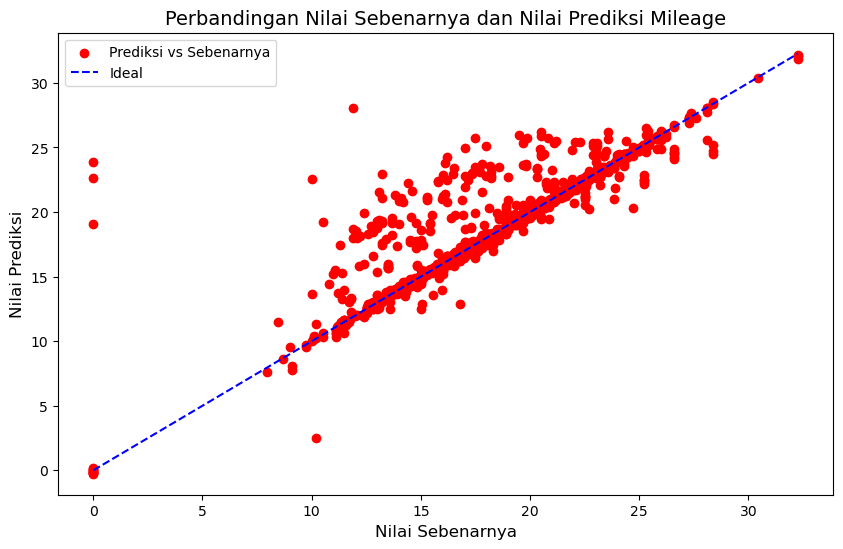

In [22]:
import matplotlib.pyplot as plt

# Scatter plot untuk membandingkan nilai sebenarnya dengan nilai yang diprediksi
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='red', label='Prediksi vs Sebenarnya')

# Menambahkan garis diagonal untuk perbandingan yang lebih baik (ideal line)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='--', label='Ideal')

# Menambahkan judul dan label
plt.title('Perbandingan Nilai Sebenarnya dan Nilai Prediksi Mileage', fontsize=14)
plt.xlabel('Nilai Sebenarnya', fontsize=12)
plt.ylabel('Nilai Prediksi', fontsize=12)

# Menambahkan legenda
plt.legend()

# Menampilkan grafik
plt.show()
